<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Gleichungen-mit-Parameter" data-toc-modified-id="Gleichungen-mit-Parameter-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gleichungen mit Parameter</a></span></li><li><span><a href="#Ungleichungen" data-toc-modified-id="Ungleichungen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ungleichungen</a></span></li><li><span><a href="#Gleichungssysteme" data-toc-modified-id="Gleichungssysteme-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gleichungssysteme</a></span><ul class="toc-item"><li><span><a href="#Eine-Isoflaeche" data-toc-modified-id="Eine-Isoflaeche-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Eine Isoflaeche</a></span></li></ul></li><li><span><a href="#Python-rechnet-komplex" data-toc-modified-id="Python-rechnet-komplex-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Python rechnet komplex</a></span></li></ul></div>

# Lektion 7

## Gleichungen mit Parameter

In [1]:
from sympy import *
init_printing()
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
#%matplotlib inline
x,y,z,a,b,c,d = symbols('x y z a b c d')

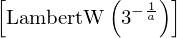

In [2]:
solve(Eq(exp(-a*x),3*x**a),x)

In [3]:
sol = solve(x*exp(x)-a,x)
sol

In [4]:
sol[0].subs(a,1).n()

In [5]:
from scipy.special.lambertw import lambertw
soln = lambdify(a,sol[0],modules={"LambertW" : lambertw})
soln(1)

(0.5671432904097838+0j)

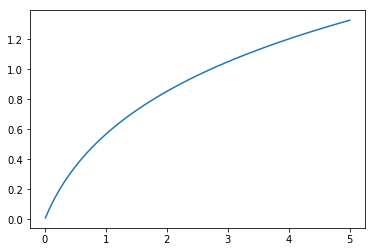

In [6]:
xn = np.linspace(0.01,5,100)
yn = soln(xn)
plt.plot(xn,np.real(yn));

## Ungleichungen

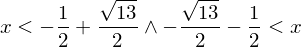

In [7]:
f = x**2 - x + 3
g = 2*x**2
solve(f>g)

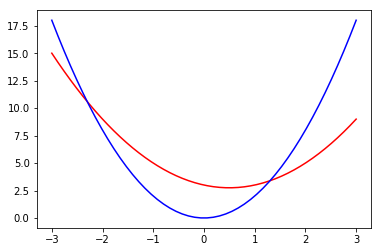

In [8]:
fig = plt.figure()
ax = fig.gca()
xn = np.linspace(-3,3)
ax.plot(xn,lambdify(x,f)(xn),'r')
ax.plot(xn,lambdify(x,g)(xn),'b');

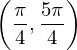

In [9]:
solveset(sin(x)>cos(x),x,domain=S.Reals)

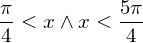

In [10]:
solve(sin(x)>cos(x),x)

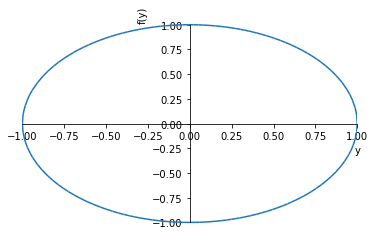

In [11]:
gl = Eq(x**2+y**2,1)
sol = solve(gl)
fig3 = plot(sol[0][x],sol[1][x],(y,-1,1))
fig3._backend.ax.set_aspect('equal')

In [12]:
gl = Eq(x*y,0)
sol = solve(gl)
sol

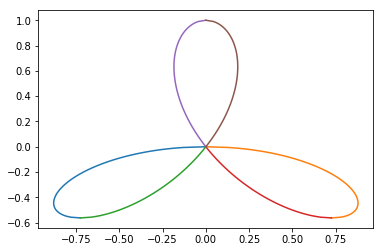

In [13]:
gl = Eq((x**2 + y**2)**2 + 3*x**2*y - y**3)
sols = solve(gl)
fig = plt.figure()
ax = fig.gca()

yn = np.linspace(-9/16,0,100)
for sol in sols:
    ax.plot(lambdify(y,sol[x])(yn),yn) 

yn = np.linspace(0,1,100)
ax.plot(lambdify(y,sols[2][x])(yn),yn) 
ax.plot(lambdify(y,sols[3][x])(yn),yn);

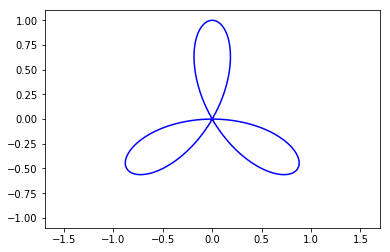

In [14]:
fig = plt.figure()
ax = fig.gca()
xn = np.linspace(-1.1,1.1,100)
X,Y = np.meshgrid(xn,xn)
ax.contour(X,Y,lambdify((x,y),gl.lhs)(X,Y),[0],colors='blue')
ax.axis('equal');

## Gleichungssysteme

In [15]:
glnS = {Eq(x+y,a),Eq(2*x-b*y,3)} 
gln = (Eq(x+y,a),Eq(2*x-b*y,3))
gln

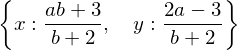

In [16]:
sol = solve(gln,(x,y))
sol

In [17]:
gln = {Eq(x**2+y**2-1,0),Eq(x-y,0)}
gln

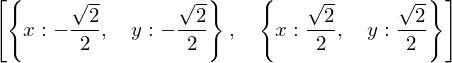

In [18]:
lsg = solve(gln,{x,y})
lsg

In [19]:
[gl.subs(l) for l in lsg for gl in gln ]

In [20]:
list(gln)[0].lhs , list(gln)[1]

In [21]:
[gl.lhs for gl in gln]

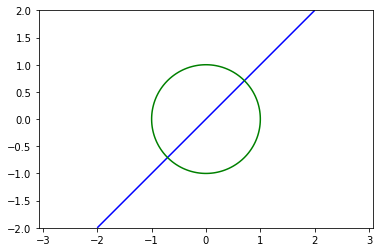

In [22]:
xn = np.linspace(-2,2,100)
X,Y = np.meshgrid(xn,xn)
fig = plt.figure()
ax = fig.gca()
ax.contour(X,Y,lambdify((x,y),list(gln)[0].lhs)(X,Y),[0],colors='blue')
ax.contour(X,Y,lambdify((x,y),list(gln)[1].lhs)(X,Y),[0],colors='green')
ax.axis('equal')

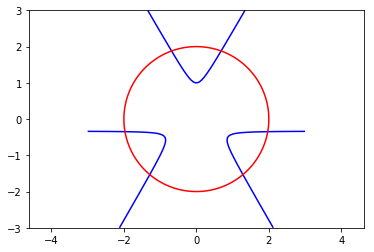

In [23]:
f = x**2+y**2+3*x**2*y-y**3
g = x**2+y**2
xn = np.linspace(-3,3,100)
X,Y = np.meshgrid(xn,xn)
fig = plt.figure()
ax = fig.gca()
ax.contour(X,Y,lambdify((x,y),f)(X,Y),[0],colors='blue')
ax.contour(X,Y,lambdify((x,y),g)(X,Y),[4],colors='red')
ax.axis('equal');

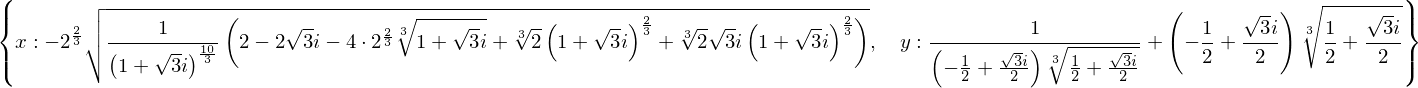

In [24]:
sol = solve({f, x**2+y**2-4})
x0 = sol[0]
x0

In [25]:
for l in sol:
    print('x {0: 12.9f} + {1: 12.9f} i \t'.format(float(re(l[x]).n()), float(im(l[x]).n())), \
          ' y {0: 12.9f} + {1: 12.9f} i'.format(float(re(l[y]).n()), float(im(l[y]).n())))

x -1.285575219 + -0.000000000 i 	  y -1.532088886 + -0.000000000 i
x  1.285575219 +  0.000000000 i 	  y -1.532088886 + -0.000000000 i
x -1.969615506 + -0.000000000 i 	  y -0.347296355 + -0.000000000 i
x  1.969615506 +  0.000000000 i 	  y -0.347296355 + -0.000000000 i
x -0.684040287 + -0.000000000 i 	  y  1.879385242 +  0.000000000 i
x  0.684040287 + -0.000000000 i 	  y  1.879385242 +  0.000000000 i


In [26]:
im(sol[4][y]).n()

### Eine Isoflaeche

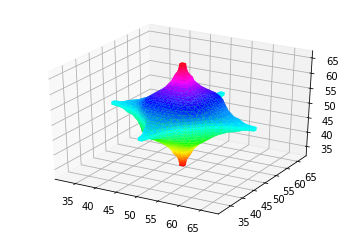

In [27]:
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
xn=np.linspace(-5,5,100)
X,Y,Z = np.meshgrid(xn,xn,xn)
vol = X**4+Y**4+Z**4+1000*(X**4+Y**4)*(X**4+Z**4)*(Y**4+Z**4)-10
#vol = X**2+Y**2+Z**2-25
verts, faces, _, __ = measure.marching_cubes(vol, 0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:,0],verts[:,1],faces,verts[:,2],cmap='hsv')

## Python rechnet komplex

In [28]:
z = x + I*y
z

In [29]:
z**4

In [30]:
re(z**4).expand()

In [31]:
abs(z)

In [32]:
re(z)

In [33]:
im(z)

In [34]:
x, y = symbols('x y',real=True)
z = x + I*y

In [35]:
re(z**4).expand()

In [36]:
abs(z)